# Applied Data Science Capstone Project

### Project Title: New York City Bridge Inspection Score Indicators and Prioritization

### Business Problem/Project Description: The New York City Department of Transportation ("DOT") has a repository of data that contains bridge inspection scores on a scale of 1-7, with 1 being the lowest and 7 being the highest. The DOT wants some insight into the amount of bridges that need repair, and which ones will require priority.

### Data to Be Used: Details
The data to be used in this analysis will be sourced exclusively from the DOT on Kaggle. The data is represented on CSVs.
Details: The CSV will provide a list of bridges, their inspection scores, and their locations. The main variable that will be used in this analysis will be the inspection score. 

#### Import relevant packages

In [48]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests
import scipy
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#### Gather Data from CSVs

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
g
df_data_1 = pd.read_csv(body)
df_data_1.head()


,Region Code,County Name,Municipality,Location,Route Carried and Reference Marker,Owner,Year Built,Date Last Inspected,SD FO Status,Condition Rating
0,3,Onondaga,Syracuse City,JCT OF RTS I-81 NB + 173,81I 81I33032010,NYSDOT,2006,2015-06-25T00:00:00.000,FO,6.259
1,4,Livingston,Livonia Town,1.3 MI SW OF HEMLOCK,RIX HILL ROAD,County,1930,2015-10-06T00:00:00.000,FO,4.140
2,8,Putnam,Southeast Town,0.3 MI E JCT RTS I84+I684,STARR RIDGE ROAD,NYSDOT,1967,2015-11-06T00:00:00.000,FO,4.349
3,8,Westchester,Mamaroneck Town,.4 MI N JCT SH 125 & US 1,125 125 87011004,NYSDOT,1886,2015-12-22T00:00:00.000,FO,5.638
4,5,Chautauqua,Westfield Town,2.6 MI SE JCT RTS 394+I90,394 17 52011028,NYSDOT,1941,2015-05-19T00:00:00.000,N,5.181


In [4]:
df = df_data_1
df = df.dropna(subset=['Condition Rating'])
df = df[(df[['Condition Rating']] != 0).all(axis=1)]


In [5]:
df['Condition Rating'].mean()

5.345092647732452

In [6]:
df_region = df.groupby(['Region Code'], as_index=False).mean()

In [7]:
df_region

,Region Code,Year Built,Condition Rating
0,1,1968.751574,5.438161
1,2,1965.365835,5.368751
2,3,1969.915189,5.176958
3,4,1969.979784,5.363113
4,5,1973.428571,5.489555
5,6,1978.349063,5.669427
6,7,1969.429547,5.449796
7,8,1962.421386,5.095552
8,9,1971.172619,5.465777
9,10,1961.997089,5.333041


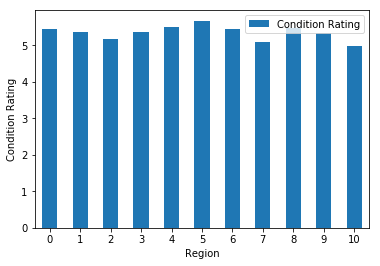

In [9]:
ax = df_region.plot.bar(y='Condition Rating', rot=0)
ax.set_xlabel('Region')
ax.set_ylabel('Condition Rating')
ax

In [10]:
df_parsed = df.drop(['County Name', 'Municipality', 'Location', 'Route Carried and Reference Marker', 'Owner', 'Year Built', 'Date Last Inspected'], axis = 1) 
df_parsed.head()

,Region Code,SD FO Status,Condition Rating
0,3,FO,6.259
1,4,FO,4.140
2,8,FO,4.349
3,8,FO,5.638
4,5,N,5.181


In [1]:
df_status = df_parsed.groupby(['Region Code', 'SD FO Status'], as_index=True).agg('count')
df_status.rename(columns={'Condition Rating': 'Count'}, inplace=True)
df_status

NameError: name 'df_parsed' is not defined

In [12]:
df_SDFO = df.groupby(['SD FO Status']).mean()
df_SDFO = df_SDFO.drop(['Region Code', 'Year Built'], axis = 1)
df_SDFO

,Condition Rating
SD FO Status,
FO,5.167758
N,5.578176
SD,4.458563


In [13]:
df.sort_values(by=['Year Built'])

,Region Code,County Name,Municipality,Location,Route Carried and Reference Marker,Owner,Year Built,Date Last Inspected,SD FO Status,Condition Rating
9769,7,Jefferson,Hounsfield Town,0.2 MI N OF SACKETS HARBO,MILITARY ROAD,County,1800,2015-08-13T00:00:00.000,FO,6.810
2462,1,Greene,Catskill Town,HAMLET OF LEEDS,COUNTY ROAD 23B,County,1825,2015-08-05T00:00:00.000,N,4.474
2386,7,Clinton,Keeseville Village (,IN KEESEVILLE,MAIN STREET,County,1842,2015-08-10T00:00:00.000,SD,4.611
1649,11,Kings,New York City (Pt.),IN BOROUGH PARK,5TH AVENUE,City,1850,2015-09-10T00:00:00.000,FO,5.333
3899,1,Rensselaer,Hoosick Town,.2 MILE NORTH OF BUSKIRK,COUNTY ROAD 103,County,1850,2015-08-19T00:00:00.000,FO,5.016
12777,3,Onondaga,Syracuse City,JCT RTE 5 + ONONDAGA CR,5 5 33081091,City,1850,2015-08-12T00:00:00.000,FO,4.692
3484,9,Sullivan,Delaware Town,1.1 MI S OF JEFFERSONVLLE,SICKMILLER ROAD,County,1850,2015-07-21T00:00:00.000,FO,4.704
7597,3,Tompkins,Newfield Town,IN NEWFIELD,COVERED BRIDGE ST,County,1853,2015-07-16T00:00:00.000,FO,4.569
9575,2,Herkimer,Newport Village,IN VILLAGE OF NEWPORT,OLD STATE ROAD,County,1853,2014-11-20T00:00:00.000,FO,5.500
17128,7,Jefferson,Adams Village,.2 MI S JCT RTS 11 & 178,11 11 73051102,NYSDOT,1856,2014-10-08T00:00:00.000,N,5.306


In [14]:
bins = [1800, 1900, 1925, 1950, 1975, 2000, 2019]
df['binned'] = pd.cut(df['Year Built'], bins)
df.head()

,Region Code,County Name,Municipality,Location,Route Carried and Reference Marker,Owner,Year Built,Date Last Inspected,SD FO Status,Condition Rating,binned
0,3,Onondaga,Syracuse City,JCT OF RTS I-81 NB + 173,81I 81I33032010,NYSDOT,2006,2015-06-25T00:00:00.000,FO,6.259,"(2000, 2019]"
1,4,Livingston,Livonia Town,1.3 MI SW OF HEMLOCK,RIX HILL ROAD,County,1930,2015-10-06T00:00:00.000,FO,4.140,"(1925, 1950]"
2,8,Putnam,Southeast Town,0.3 MI E JCT RTS I84+I684,STARR RIDGE ROAD,NYSDOT,1967,2015-11-06T00:00:00.000,FO,4.349,"(1950, 1975]"
3,8,Westchester,Mamaroneck Town,.4 MI N JCT SH 125 & US 1,125 125 87011004,NYSDOT,1886,2015-12-22T00:00:00.000,FO,5.638,"(1800, 1900]"
4,5,Chautauqua,Westfield Town,2.6 MI SE JCT RTS 394+I90,394 17 52011028,NYSDOT,1941,2015-05-19T00:00:00.000,N,5.181,"(1925, 1950]"


In [30]:
df_bin = df.groupby(['binned']).mean()
df_bin = df_bin.drop(['Region Code'],axis=1)
df_bin

,Year Built,Condition Rating
binned,,
"(1800, 1900]",1889.461538,4.756365
"(1900, 1925]",1914.648794,4.812457
"(1925, 1950]",1936.934262,4.864932
"(1950, 1975]",1963.167847,5.026297
"(1975, 2000]",1989.195680,5.632696
"(2000, 2019]",2007.456315,6.548966


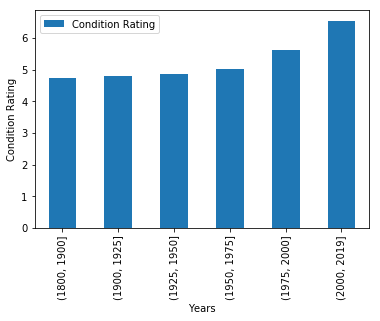

In [16]:
ax1 = df_bin.plot.bar(y='Condition Rating', rot=0)
ax1.set_xlabel('Years')
ax1.set_ylabel('Condition Rating')
ax1.tick_params(axis='x', labelrotation=90)
ax1

In [17]:
bins1 = [1, 3, 5, 7]
df['binned1'] = pd.cut(df['Condition Rating'], bins1)
df.head()

,Region Code,County Name,Municipality,Location,Route Carried and Reference Marker,Owner,Year Built,Date Last Inspected,SD FO Status,Condition Rating,binned,binned1
0,3,Onondaga,Syracuse City,JCT OF RTS I-81 NB + 173,81I 81I33032010,NYSDOT,2006,2015-06-25T00:00:00.000,FO,6.259,"(2000, 2019]","(5, 7]"
1,4,Livingston,Livonia Town,1.3 MI SW OF HEMLOCK,RIX HILL ROAD,County,1930,2015-10-06T00:00:00.000,FO,4.140,"(1925, 1950]","(3, 5]"
2,8,Putnam,Southeast Town,0.3 MI E JCT RTS I84+I684,STARR RIDGE ROAD,NYSDOT,1967,2015-11-06T00:00:00.000,FO,4.349,"(1950, 1975]","(3, 5]"
3,8,Westchester,Mamaroneck Town,.4 MI N JCT SH 125 & US 1,125 125 87011004,NYSDOT,1886,2015-12-22T00:00:00.000,FO,5.638,"(1800, 1900]","(5, 7]"
4,5,Chautauqua,Westfield Town,2.6 MI SE JCT RTS 394+I90,394 17 52011028,NYSDOT,1941,2015-05-19T00:00:00.000,N,5.181,"(1925, 1950]","(5, 7]"


In [28]:
df_bin1 = df.groupby(['binned1']).count()
df_bin1 = df_bin1.drop(['Region Code', 'SD FO Status', 'Condition Rating','County Name', 'Municipality', 'Location', 'Route Carried and Reference Marker', 'Owner', 'Year Built', 'Date Last Inspected'],axis = 1)
df_bin1 = df_bin1.rename(columns={"binned": "Count"})
df_bin1

,Count
binned1,
"(1, 3]",25
"(3, 5]",6545
"(5, 7]",10893


In [34]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

target = pd.DataFrame(data.target, columns=["Condition Rating"])

NameError: name 'data' is not defined

In [39]:
df_parse = df.drop(['Region Code', 'County Name','SD FO Status','County Name', 'Municipality', 'Location', 'Route Carried and Reference Marker', 'Owner', 'Date Last Inspected','binned', 'binned1'],axis = 1)
df_parse

,Year Built,Condition Rating
0,2006,6.259
1,1930,4.140
2,1967,4.349
3,1886,5.638
4,1941,5.181
5,1954,4.422
6,1952,5.558
7,1953,4.625
8,1999,6.476
9,1974,4.554


In [43]:
X = df_parse.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_parse.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

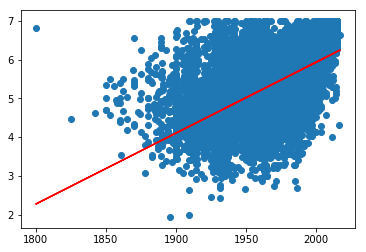

In [50]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()